# VWAP - Tick Forecast
_Version 2.0_

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import vwap2 as vw

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [2]:
# set up some variables
tickfile = '../data/TSLA-TAQ-aug19v2.zip'
test_day = '2019-08-30'
taq = pd.read_pickle(tickfile)

In [3]:
# filter on date
day = taq[test_day]

## VWAP Target Function

In [4]:
vwap_coefs = [ 6.82705253e-03, -4.98952946e-05,  2.47593111e-07, -6.04833777e-10, 5.78006232e-13]

## Run the Algo with Tick Factor

In [23]:
# without the tick signal...
order_quantity = 300000
order_side = 's'
results = vw.algo_loop(day, order_side, order_quantity, vwap_coefs)

2020-03-03 06:29:29:081479: Beginning VWAP run: s 300000 shares
Average stock spread for sample: 1.3625
2020-03-03 06:29:29:199006: starting main loop
2020-03-03 06:31:14:585263: end simulation loop
2020-03-03 06:31:14:585263: order analytics
2020-03-03 06:31:14:663369: VWAP run complete.


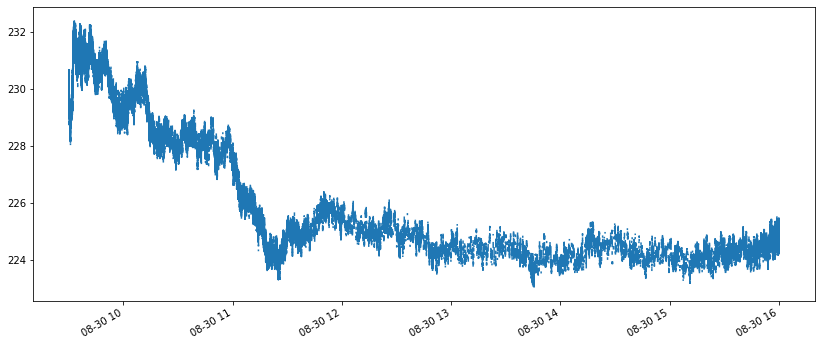

In [24]:
results['fair_values'].plot()

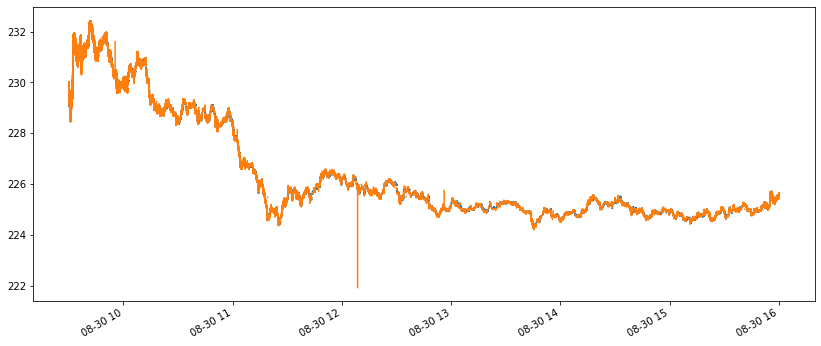

In [25]:
results['midpoints'].plot()
day.trade_px.plot()

In [26]:
data = results['trades']

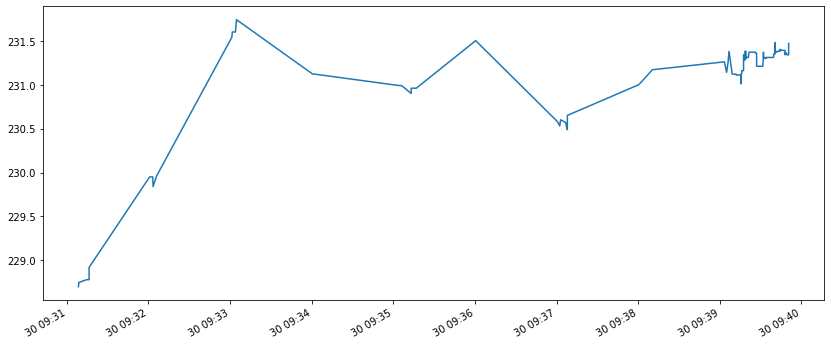

In [40]:
data.price.plot()

In [29]:
data['shares'].sum()

323941.0

In [30]:
results.keys()

dict_keys(['midpoints', 'fair_values', 'schedule_factors', 'tick_factors', 'trades', 'quote_count', 'day_vwap', 'avg_price'])

In [31]:
results['day_vwap']

227.90490596599633

In [32]:
results['avg_price']

231.26324583797668

In [33]:
#slippage vs. vwap
results['day_vwap'] - results['avg_price']

-3.3583398719803483

In [34]:
results['trades'].groupby(['trade_type']).count()

,price,shares,bar
trade_type,,,
a,439,439,439
p,200,200,200


In [38]:
results['trades'].tail()

,price,shares,bar,trade_type
2019-08-30 09:39:50.614305182,231.34,700,9,a
2019-08-30 09:39:50.614354185,231.34,700,9,a
2019-08-30 09:39:50.614359717,231.34,700,9,a
2019-08-30 09:39:50.614360586,231.34,700,9,a
2019-08-30 09:39:50.614380829,231.47,100,9,p
